## TASK1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('DS2_C6_S1_Insurance_Data_Challenge.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Task2

In [4]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
df.shape

(1338, 7)

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## TASK3

In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## TASK4

In [8]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
df[['sex','smoker','region']]= df[['sex','smoker','region']].astype('category')

In [10]:
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [11]:
label_encoder = preprocessing.LabelEncoder()

In [12]:
df['sex_encode']= label_encoder.fit_transform(df['sex'])
df['smoker_encode']= label_encoder.fit_transform(df['smoker'])
df['region_encode']= label_encoder.fit_transform(df['region'])

In [13]:
def feature_scale(scale):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    new_Insurance_df = df.select_dtypes(include=numerics)
    if scale == 'minmax':
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(new_Insurance_df.to_numpy()),columns=new_Insurance_df.columns)
    return df_scaled

In [14]:
scale = 'minmax' #standard
Insurance_df_scaled=feature_scale(scale)
Insurance_df_scaled

,age,bmi,children,charges,sex_encode,smoker_encode,region_encode
0,0.021739,0.321227,0.0,0.251611,0.0,1.0,1.000000
1,0.000000,0.479150,0.2,0.009636,1.0,0.0,0.666667
2,0.217391,0.458434,0.6,0.053115,1.0,0.0,0.666667
3,0.326087,0.181464,0.0,0.333010,1.0,0.0,0.333333
4,0.304348,0.347592,0.0,0.043816,1.0,0.0,0.333333
...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299,1.0,0.0,0.333333
1334,0.000000,0.429379,0.0,0.017305,0.0,0.0,0.000000
1335,0.000000,0.562012,0.0,0.008108,0.0,0.0,0.666667
1336,0.065217,0.264730,0.0,0.014144,0.0,0.0,1.000000


In [15]:
corr=Insurance_df_scaled.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges,sex_encode,smoker_encode,region_encode
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002127
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,0.157566
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.016569
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.006208
sex_encode,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,0.004588
smoker_encode,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.002181
region_encode,0.002127,0.157566,0.016569,-0.006208,0.004588,-0.002181,1.000000


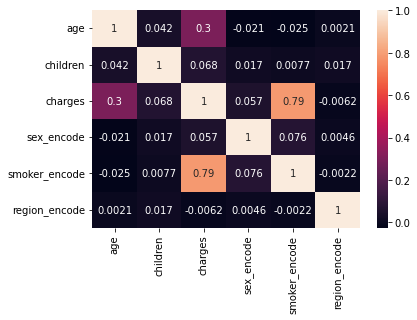

In [16]:
new_df_scaled=Insurance_df_scaled[['age','children', 'charges','sex_encode', 'smoker_encode', 'region_encode',]]
hm = sns.heatmap(new_df_scaled.corr(), annot = True)
plt.show()

## TASK5

In [17]:
Insurance_df_c=new_df_scaled
train_num=int(1338*0.7)
Insurance_df_train = Insurance_df_c.iloc[:train_num,:]
Insurance_df_test = Insurance_df_c.iloc[(train_num+1):,:]
print("Shape of new dataframes - {} , {}".format(Insurance_df_train.shape, Insurance_df_test.shape))

Shape of new dataframes - (936, 6) , (401, 6)


In [18]:
y = Insurance_df_scaled['smoker_encode']
X = Insurance_df_scaled[['sex_encode','region_encode','charges','age','bmi','children']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print("Shape of new dataframes - {} , {}".format(X_train.shape, X_test.shape))

Shape of new dataframes - (936, 6) , (402, 6)


## TASK6

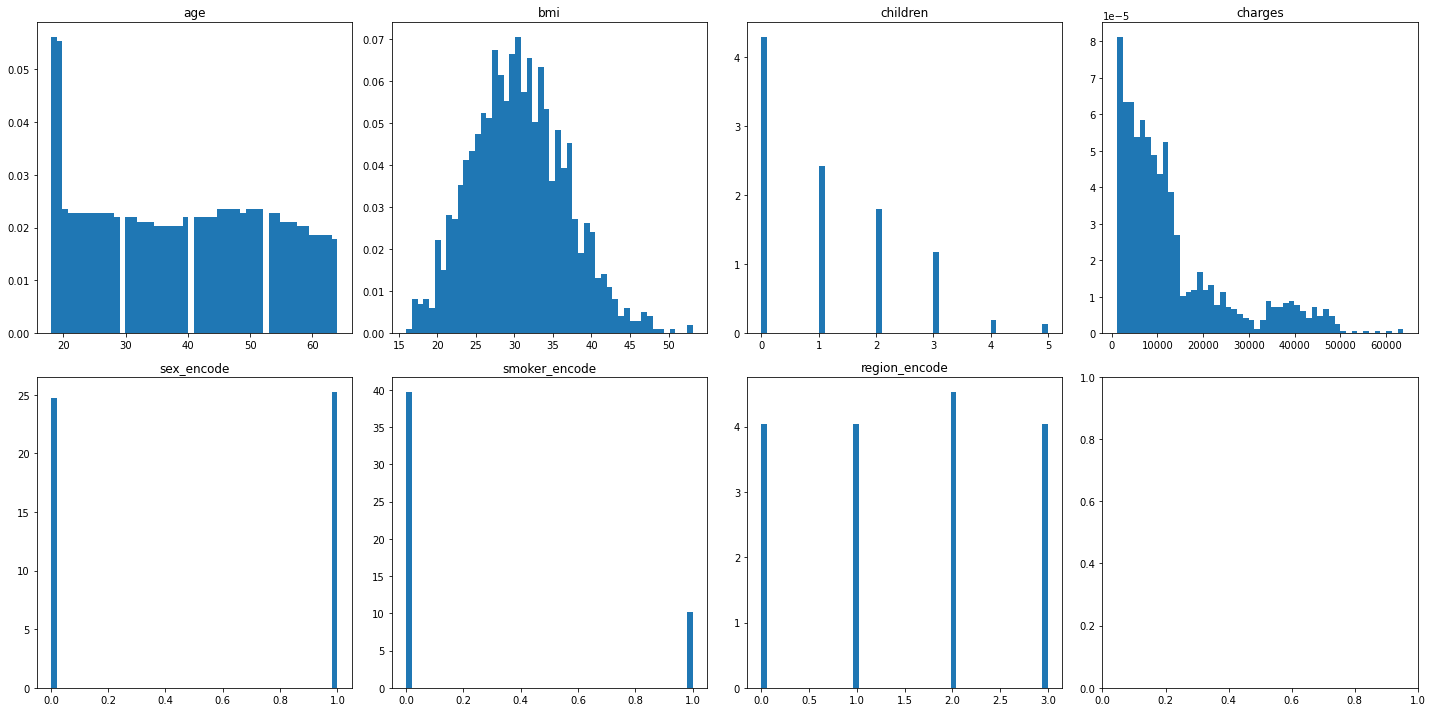

In [19]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
new_Insurance_df = df.select_dtypes(include=numerics)
numeric_cols=new_Insurance_df.columns
num_cols=4
n_bins = 50
# compute number of rows for plot
num_rows= int(len(numeric_cols)/num_cols)+1
# setting canvas for plotting
fig, axs = plt.subplots(num_rows, num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_Insurance_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()
